# РК1
### Студент: Фонканц Роман Викторович 
### Группа: ИУ5-21М
### Номер по списку группы (вариант): 14

#### Вариант задачи №1 - 14

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".

#### Вариант задачи №2 - 34

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

#### Дополнительное задание (по группам)
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".


##Импортирование необходимых библиотек

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
sns.set(style="ticks")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задача 1 (№14)
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".

Произведем загрузку данных и выведем распределения признаков

In [135]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [136]:
data = pd.read_csv("/content/drive/MyDrive/data/WineQT.csv", sep=",")

In [137]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [138]:
data = data.drop('Id', 1)
data.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


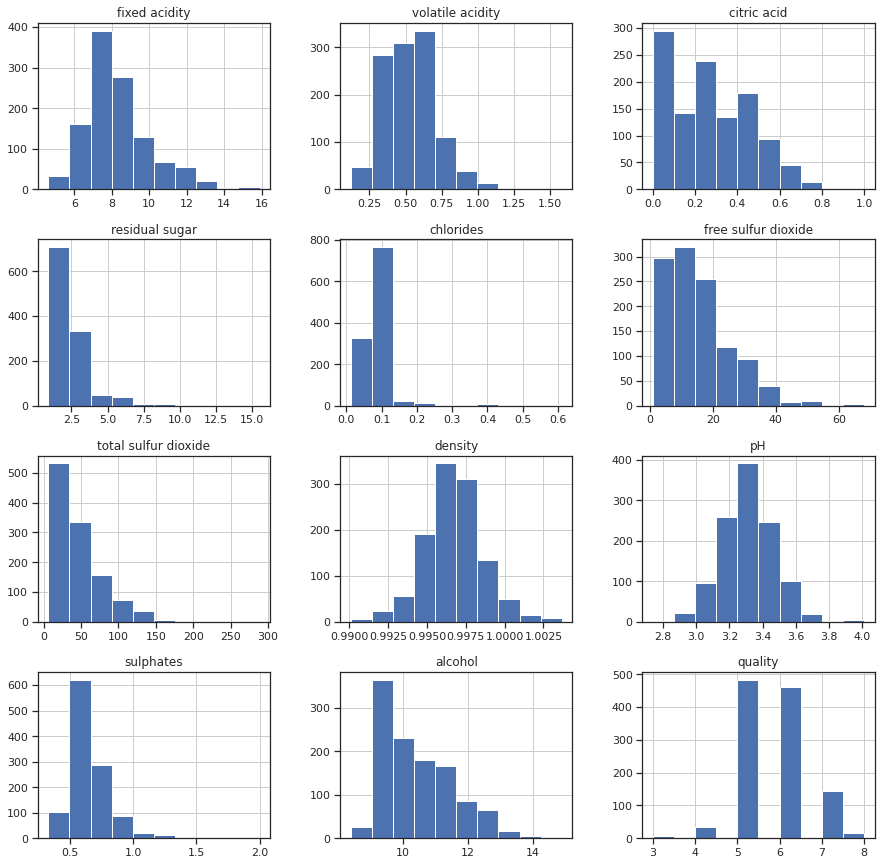

In [139]:
data.hist(figsize=(15,15))
plt.show()

###Исходное распределение 
Как видно, оно несколько отличается от нормального распределения

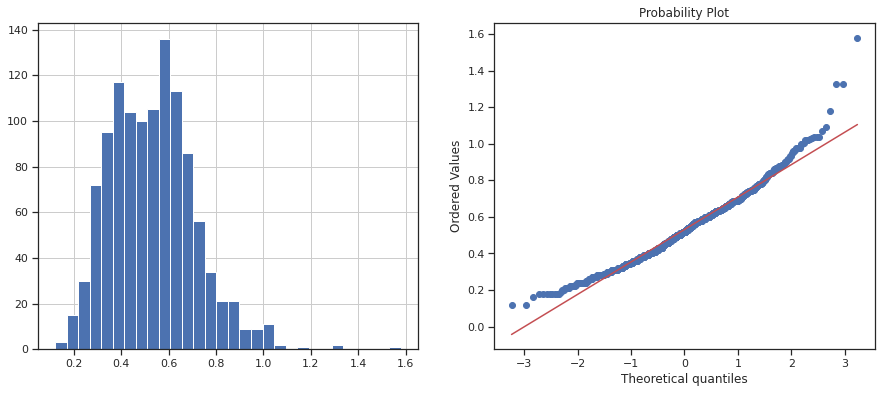

In [140]:
diagnostic_plots(data, 'volatile acidity')

Побробуем провести нормализацию с помощью функции "квадратный корень"

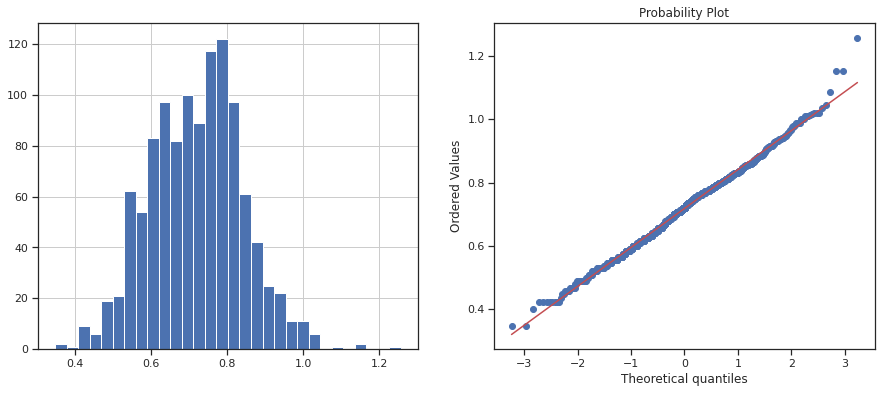

In [141]:
data['volatile acidity_sqr'] = data['volatile acidity']**(1/2) 
diagnostic_plots(data, 'volatile acidity_sqr')

Исходя из полученного графика, видно, что с помощью функции "квадратный корень" удалось успешно нормализовать признак "volatile acidity" (летучая кислотность)

## Задача 2 (№34)
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

Подготовим *DataFrame* на основе нашего набора данных из "Задания №1"

In [142]:
#wine = load_wine()
#wine_X = wine.data
#wine_y = wine.target
#wine_feature_names = wine['feature_names']
#wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

wine_X = data.drop('quality', 1).values
wine_y= data['quality'].values
wine_feature_names = list(data.drop('quality', 1).keys())
wine_x_df = pd.DataFrame(data=wine_X, columns=wine_feature_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


Используем *логистическую регрессию* и выведем *коэффициенты регрессии*

In [143]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-1.68336005e-01, -9.97504323e-01,  1.10922222e+01,
         4.32510517e-01,  2.85069892e-01, -2.72426800e-02,
        -6.39291915e-02, -1.00446565e+01,  8.71090569e+00,
        -1.38157830e+00, -2.71893802e+00,  2.17939592e+01],
       [ 1.39462786e-01, -9.60281003e-01, -4.29711094e-02,
         7.80777304e-02,  3.76835386e+00,  1.26913489e-02,
        -1.19025220e-02, -1.10526085e+01,  3.76393183e+00,
         9.95397645e-01, -2.82275449e-01,  8.28756539e+00],
       [-1.71066737e-01, -4.31562156e+00,  1.56254300e+00,
        -1.79225066e-02,  1.85616655e+00, -1.37748536e-02,
         1.38559950e-02,  4.36423077e+00, -5.09352869e-01,
        -2.95334751e+00, -9.15522317e-01,  1.01296897e+01],
       [ 1.74738461e-01, -8.97086134e+00, -1.98059196e+00,
        -6.31169279e-02,  1.53640184e+00,  1.79484374e-02,
        -1.12675162e-02, -4.76022406e+00,  1.04328164e+00,
         1.05110919e+00,  2.47841515e-01,  1.04425003e+01],
       [ 2.06114989e-02, -2.21625700e+00,  7.7986468

Получили, что все признаки являются "*хорошими*" и важными

In [144]:
# Все признаки являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_X, wine_y)
for feature, flag in zip(wine_feature_names, sel_e_lr1.get_support()):
  print(feature, ':', flag)

fixed acidity : True
volatile acidity : True
citric acid : True
residual sugar : True
chlorides : True
free sulfur dioxide : True
total sulfur dioxide : True
density : True
pH : True
sulphates : True
alcohol : True
volatile acidity_sqr : True


Используем *линейный классификатор на основе SVM* и выведем *коэффициенты регрессии*

In [145]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00383006,  0.        ,  0.        ,  0.        ,
        -0.08806069,  0.        ],
       [-0.02741686,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00133598,  0.        ,  0.        ,  0.        ,
        -0.06326363,  0.        ],
       [ 0.01143913,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00933772,  0.00893423,  0.        ,  0.42941557,  0.        ,
        -0.1868272 ,  0.        ],
       [-0.00758929,  0.        ,  0.        , -0.0070905 ,  0.        ,
         0.01006614, -0.00706442,  0.        ,  0.        ,  0.        ,
         0.00601512,  0.        ],
       [-0.00282545,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00072605, -0.00236005,  0.        , -0.39811124,  0.        ,
         0.06721988,  0.        ],
       [-0.02899952,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -

"*Хорошими*" и важными признакамии являются только признаки с флагом *True*. Остальные можно отбросить для дальнейшей работы

In [146]:
# Признаки с флагом False можно отбросить для дальнейшей работы
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(wine_X, wine_y)
for feature, flag in zip(wine_feature_names, sel_e_lr2.get_support()):
  print(feature, ':', flag)

fixed acidity : True
volatile acidity : False
citric acid : False
residual sugar : True
chlorides : False
free sulfur dioxide : True
total sulfur dioxide : True
density : False
pH : True
sulphates : False
alcohol : True
volatile acidity_sqr : False


## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

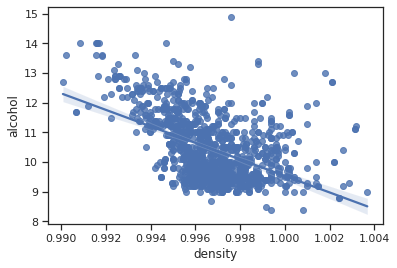

In [147]:
sns.regplot(x=data['density'], y=data['alcohol'])

Построили график рассеяния, показыающий зависимость между двумя признаками: *alcohol* (крепость вина) и *density* (плотность напитка)